In [140]:

#!pip install pandas==1.0.4
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [109]:
#Link to our dataset
url='https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv'
#load our dataset
data=pd.read_csv(url)
#view our dataset
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [110]:
#getting shape of our dataset
data.shape


(92016, 5)

In [116]:
#Getting information on our dataset data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
 5   Time       92016 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 4.2+ MB


In [113]:
#Changing FullDate column to it's correct data type Obtain the date and time from the FulllDate column
data['Time']=pd.to_datetime(data['FullDate'],format='%Y-%m-%d').dt.time
data['FullDate']=pd.to_datetime(data['FullDate'],format='%Y-%m-%d').dt.date

In [114]:
data['FullDate']=pd.to_datetime(data['FullDate'],format='%Y-%m-%d')


In [115]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice,Time
0,2010-09-01,15.8,1688.215,3.69,23.710,00:00:00
1,2010-09-01,15.8,1669.195,3.69,22.635,01:00:00
2,2010-09-01,15.8,1491.980,3.69,22.565,02:00:00
3,2010-09-01,15.8,1330.760,3.69,18.910,03:00:00
4,2010-09-01,15.8,1247.940,3.69,18.030,04:00:00


In [108]:
#Check for missing values
data.isna().sum()

Tmax        0
SysLoad     0
GasPrice    0
y           0
Time        0
dtype: int64

In [117]:
data['FullDate']=pd.to_datetime(data['FullDate'],infer_datetime_format=True)

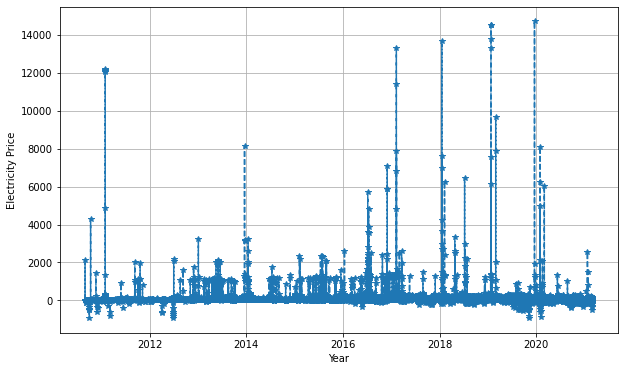

In [119]:
plt.figure(figsize=(10,6))
plt.plot(data.FullDate,data.ElecPrice,'--',marker='*',)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electricity Price');

Creating Training and Testing Dataset.

In [120]:
train_data=data['FullDate'][:2757]

In [121]:
test_data=data['FullDate'][-89259:]

Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’). Answer question 14 - 16

In [122]:
#Rename columns 
data=data.rename(columns={"FullDate":"ds","ElecPrice":"y"})
data.head()

,ds,Tmax,SysLoad,GasPrice,y,Time
0,2010-09-01,15.8,1688.215,3.69,23.710,00:00:00
1,2010-09-01,15.8,1669.195,3.69,22.635,01:00:00
2,2010-09-01,15.8,1491.980,3.69,22.565,02:00:00
3,2010-09-01,15.8,1330.760,3.69,18.910,03:00:00
4,2010-09-01,15.8,1247.940,3.69,18.030,04:00:00


In [145]:
#Initialize our model
model=Prophet()
model.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpejnmcxf6/4mlfxcn3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpejnmcxf6/_2hxlwet.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86871', 'data', 'file=/tmp/tmpejnmcxf6/4mlfxcn3.json', 'init=/tmp/tmpejnmcxf6/_2hxlwet.json', 'output', 'file=/tmp/tmpejnmcxf6/prophet_modeld_v1s26o/prophet_model-20230131140305.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:03:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:03:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Predict for the next 10 months
future=model.make_future_dataframe(periods=10,freq='M')
forecast=model.predict(future)
forecast.head()
forecast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]

#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)

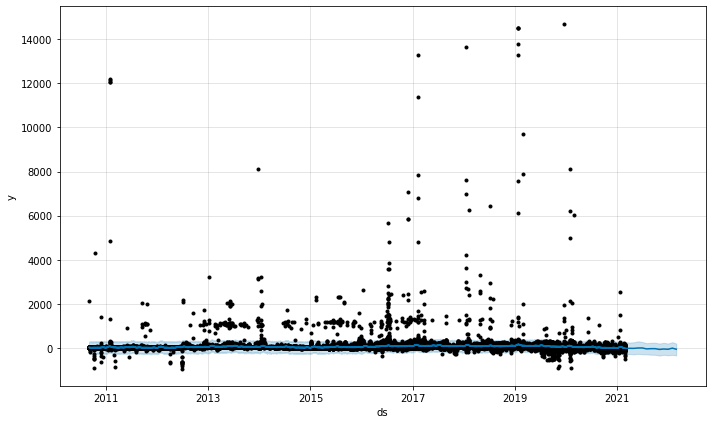

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01,31.996020,-240.940131,295.873726,31.996020,31.996020,3.429977,3.429977,3.429977,4.743221,4.743221,4.743221,-1.313244,-1.313244,-1.313244,0.0,0.0,0.0,35.425997
1,2010-09-02,32.031845,-233.060616,304.337589,32.031845,32.031845,13.540281,13.540281,13.540281,15.634235,15.634235,15.634235,-2.093954,-2.093954,-2.093954,0.0,0.0,0.0,45.572127
2,2010-09-03,32.067671,-233.598845,293.415663,32.067671,32.067671,-0.347662,-0.347662,-0.347662,2.619466,2.619466,2.619466,-2.967129,-2.967129,-2.967129,0.0,0.0,0.0,31.720008
3,2010-09-04,32.103496,-243.425419,269.740461,32.103496,32.103496,-16.362668,-16.362668,-16.362668,-12.448995,-12.448995,-12.448995,-3.913673,-3.913673,-3.913673,0.0,0.0,0.0,15.740828
4,2010-09-05,32.139321,-268.365569,282.544703,32.139321,32.139321,-20.032435,-20.032435,-20.032435,-15.118980,-15.118980,-15.118980,-4.913455,-4.913455,-4.913455,0.0,0.0,0.0,12.106887


In [156]:
#Predict for the next 10 months
future=model.make_future_dataframe(periods=12,freq='M')
forecast=model.predict(future)
forecast.head()
#yhat is the prediction  yhat_lower and yhat_upper are the upper and lower boundaries
forecast[['ds','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]
#using our model to plot the forecast data
model.plot(forecast)
plt.show()
forecast['']

In [152]:
from statsmodels.tsa.stattools import adfuller
adf_result=adfuller(data['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used :{adf_result[3]}')
print('Critical Values:')

for k,v in adf_result[4].items():
    print(f' {k}:{v}')

ADF Statistic: -18.17067542641451
p-value: 2.4474966090684217e-30
No. of lags used: 67
No. of observations used :91948
Critical Values:
 1%:-3.430421121531399
 5%:-2.861571434572286
 10%:-2.566786731528145


In [151]:
adf_result=adfuller(data['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used :{adf_result[3]}')
print('Critical Values:')

for k,v in adf_result[4].items():
    print(f' {k}:{v}')

ADF Statistic: -6.793388065452667
p-value: 2.3337605343636574e-09
No. of lags used: 48
No. of observations used :91967
Critical Values:
 1%:-3.430421106837576
 5%:-2.86157142807793
 10%:-2.566786728071412


In [154]:
from statsmodels.tsa.stattools import adfuller
adf_result=adfuller(data['y'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used :{adf_result[3]}')
print('Critical Values:')

for k,v in adf_result[4].items():
    print(f' {k}:{v}')

ADF Statistic: -31.952975699557843
p-value: 0.0
No. of lags used: 53
No. of observations used :91962
Critical Values:
 1%:-3.430421110703783
 5%:-2.8615714297867108
 10%:-2.56678672898094
